In [56]:
%pylab 
from nugridpy import mesa as ms
import os

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [85]:
# Before we start have a look at NuGrid Set1 model (Ritter+ 17)
ms.set_nugrid_path('/data/nugrid_apod2')
nsa=ms.star_log(mass=2,Z=0.0001)

nugrid_path = /data/nugrid_apod2
closest set is set1.5a (Z = 0.0001)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


In [86]:
# check we got the right model
nsa.header_attr
#nsa.get('surface_o16')[0]+nsa.get('surface_c12')[0]

{'burn_min1': 50.0,
 'burn_min2': 1000.0,
 'c12_boundary_limit': 0.0001,
 'h1_boundary_limit': 0.0001,
 'he4_boundary_limit': 0.0001,
 'initial_mass': 2.0,
 'initial_z': 0.0001}

<IPython.core.display.Javascript object>


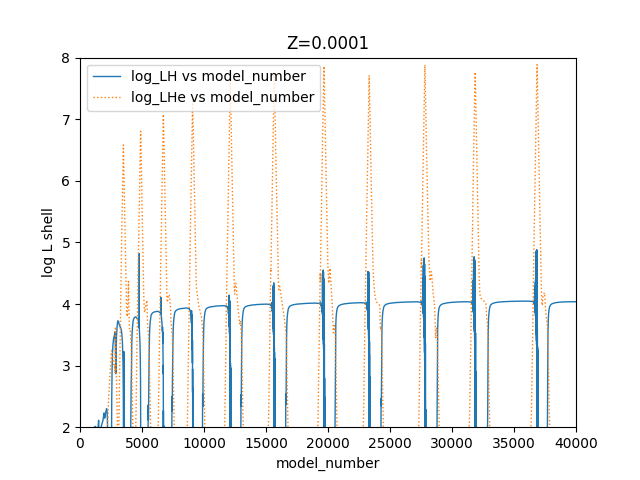

((0, 40000), <matplotlib.text.Text at 0x7fa514e0c7b8>)

In [99]:
figure(101); shapes=['-',':','--','-.']; i=0
nsa.plot('model_number','log_LH',shape=shapes[mod(i,4)]); i+=1
nsa.plot('model_number','log_LHe',shape=shapes[mod(i,4)]); i+=1
title('Z='+str(nsa.header_attr['initial_z'])); ylim(2,8); xlim(0,40000); ylabel("log L shell")

<IPython.core.display.Javascript object>


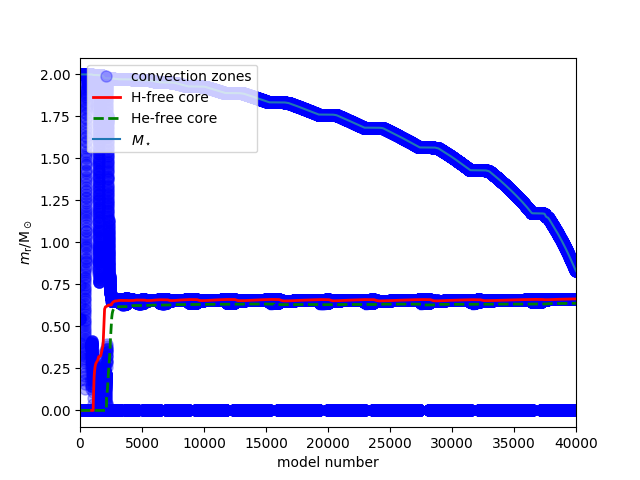

(0, 40000)

In [101]:
nsa.kippenhahn(102,'model'); xlim(0,40000)

In [58]:
from nugridpy import utils as ut

In [59]:
data_dir='/data/nugrid_apod2/scratch/MESA/Set_M2Zrange/'

In [60]:
!ls $data_dir

M2.00Z0.e-0  README.Set_template    plot_radius.py~    run_ssh.sh~
M2.00Z1.e-2  do_in_all_rundirs.sh   print_log_time.sh  vis2.py
M2.00Z1.e-3  do_in_all_rundirs.sh~  prof.py	       vis3.py
M2.00Z1.e-4  findCOgt1p15.py	    prof.py~	       vis3.py~
M2.00Z1.e-5  ipython_log.py	    rhoc-Tc.py	       vis_runs.py
M2.00Z1.e-6  kill_all.sh	    run.list	       work_template
M2.00Z1.e-7  mkidx.sh		    run.list.all
M2.00Z1.e-8  out.png		    run.list~
M2.00Z2.e-2  plot_radius.py	    run_ssh.sh


In [61]:
cases = [ case for case in os.listdir(data_dir) if  'M2.00' in case]
cases.sort()
cases[0], cases[-1] = cases[-1], cases[0] 
print(cases)

['M2.00Z2.e-2', 'M2.00Z1.e-2', 'M2.00Z1.e-3', 'M2.00Z1.e-4', 'M2.00Z1.e-5', 'M2.00Z1.e-6', 'M2.00Z1.e-7', 'M2.00Z1.e-8', 'M2.00Z0.e-0']


In [62]:
%%capture
sints=[]
for case in cases:
    sints.append(ms.star_log(os.path.join(data_dir,case,'LOGS')))


In [63]:
ZZ=[]
for s in sints:
    ZZ.append(s.header_attr['initial_z'])
print(ZZ  )  

[0.02, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 0.0]


<IPython.core.display.Javascript object>


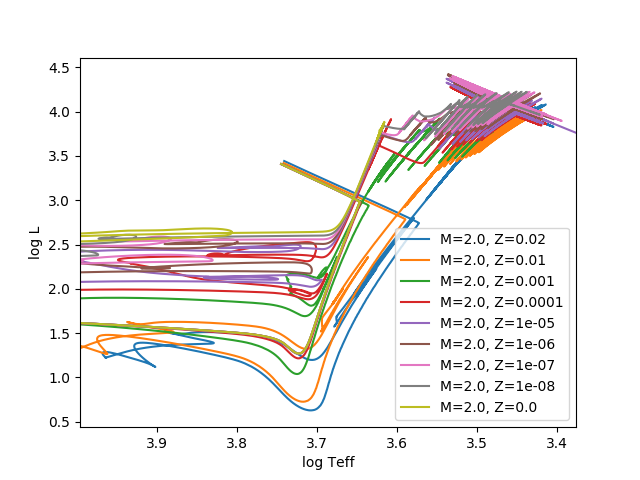

In [64]:
figure(1)
for s in sints:
    s.hrd_new()

<IPython.core.display.Javascript object>


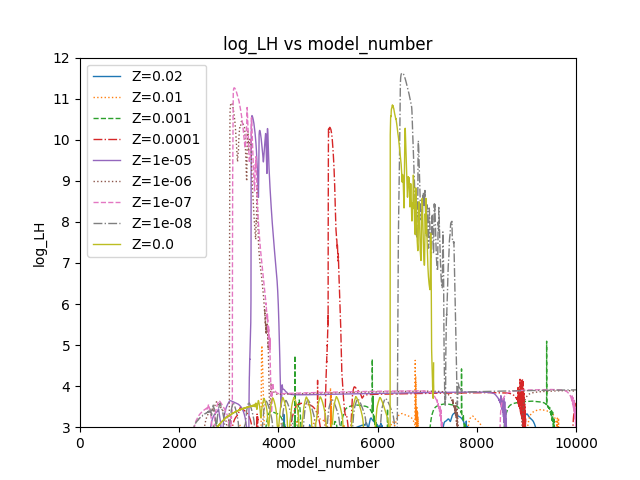

In [65]:
figure(2)
shapes=['-',':','--','-.']; i=0
for s in sints:
    s.plot('model_number','log_LH',shape=shapes[mod(i,4)],\
           legend='Z='+str(s.header_attr['initial_z'])); i+=1
    ylim(3,12); xlim(0,10000)

In [66]:
s.get('h1_boundary_mass')[-1]

0.66470864254115014

In [67]:
mhfree = []
for s in sints:
    mhfree.append(s.get('h1_boundary_mass')[-1])

In [68]:
mhfree

[0.61192592225791298,
 0.58814950288822265,
 0.57882809114290656,
 0.62697949181837875,
 0.63573186924937164,
 0.66042181784460163,
 0.67270867808645951,
 0.67629498240165953,
 0.66470864254115014]

## Core masses at end of calculation as a function of initial Z

<IPython.core.display.Javascript object>


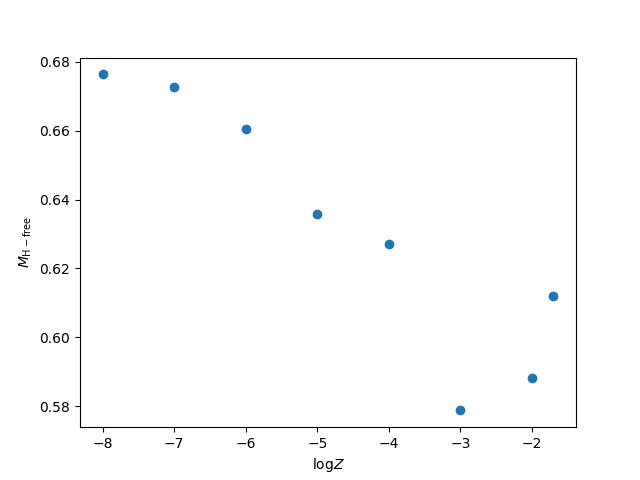

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [70]:
figure(121)
plot(log10(array(ZZ)),mhfree,'o')
xlabel('$ \log Z$'); ylabel('$M_\mathrm{H-free}$')

## Z=0.0001
This model shows a real and pronounced HIF, although the NuGrid Set1 models (Ritter+ 16) do not show that, and my 2004 models also do not show this. 

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


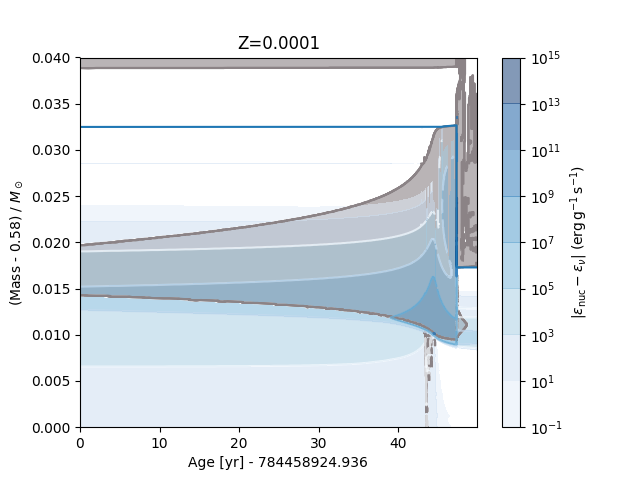

plot versus age
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [72]:
modstart=4600; s=sints[3]
s.kip_cont(ifig=15, modstart=modstart, modstop=5300, \
            t0_model=modstart, ixaxis='age', xres=2000, yres=2000, ylims=[0.58,0.62])
title('Z='+str(s.header_attr['initial_z']))

<IPython.core.display.Javascript object>


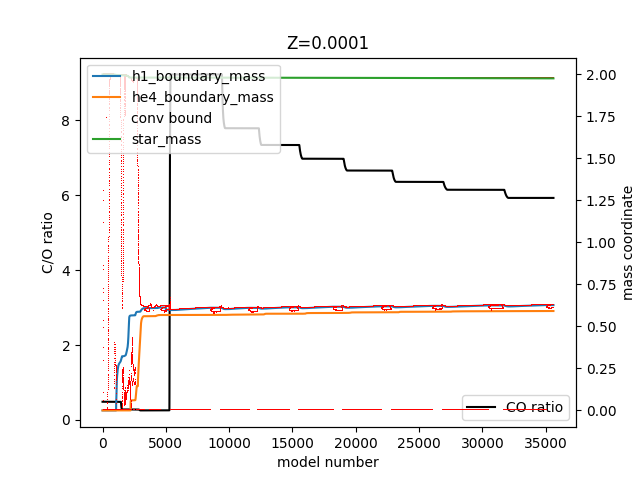

<IPython.core.display.Javascript object>


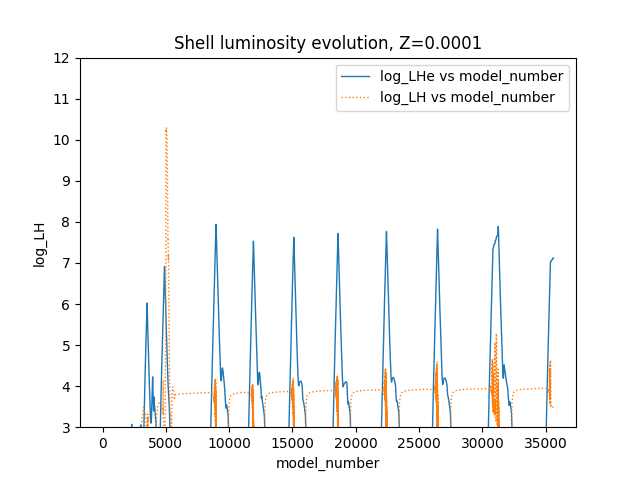

<IPython.core.display.Javascript object>


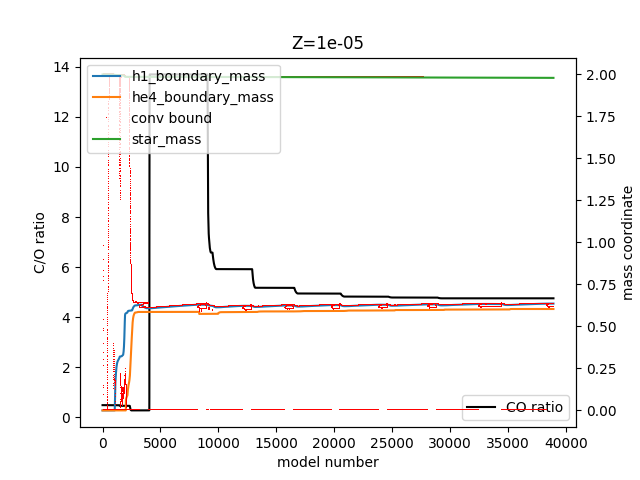

<IPython.core.display.Javascript object>


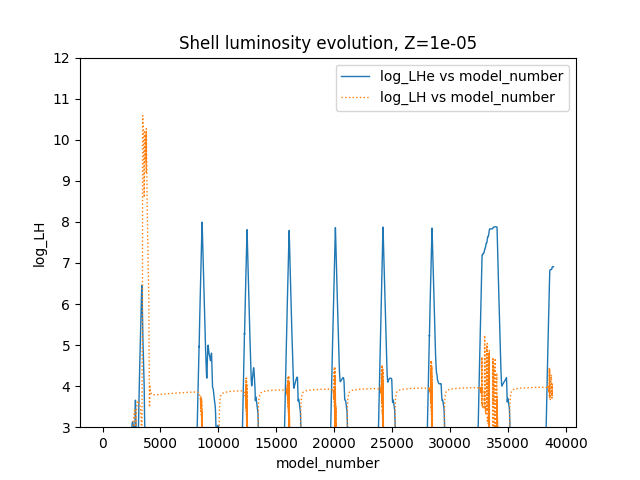

<IPython.core.display.Javascript object>


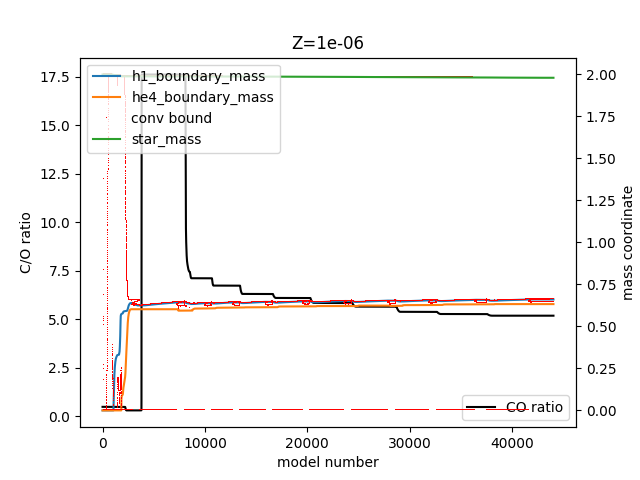

<IPython.core.display.Javascript object>


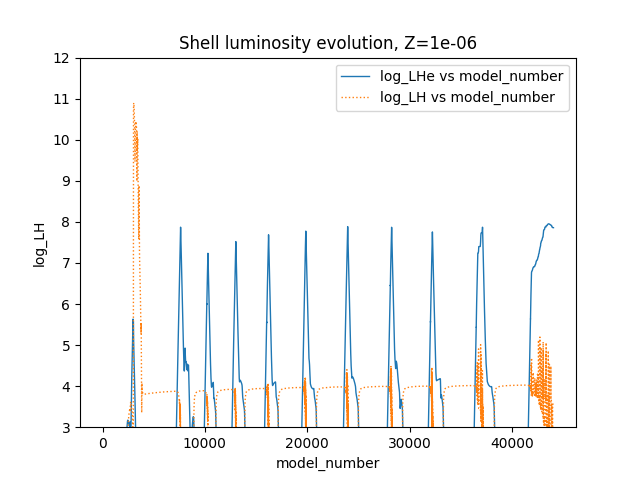

<IPython.core.display.Javascript object>


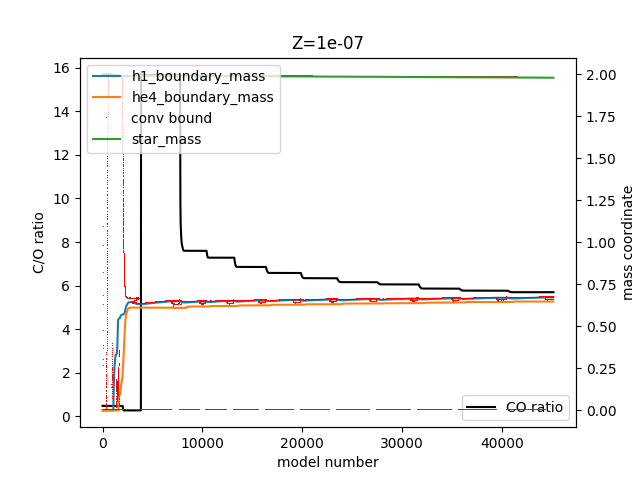

<IPython.core.display.Javascript object>


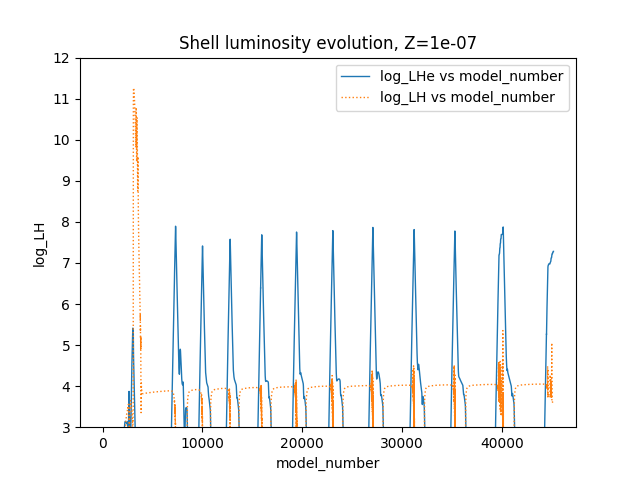

<IPython.core.display.Javascript object>


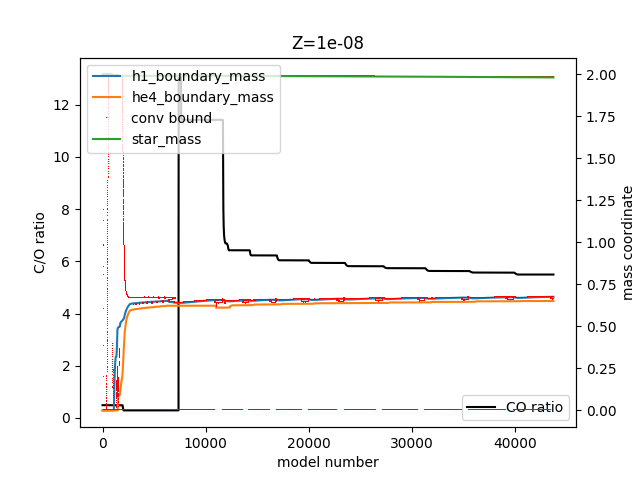

<IPython.core.display.Javascript object>


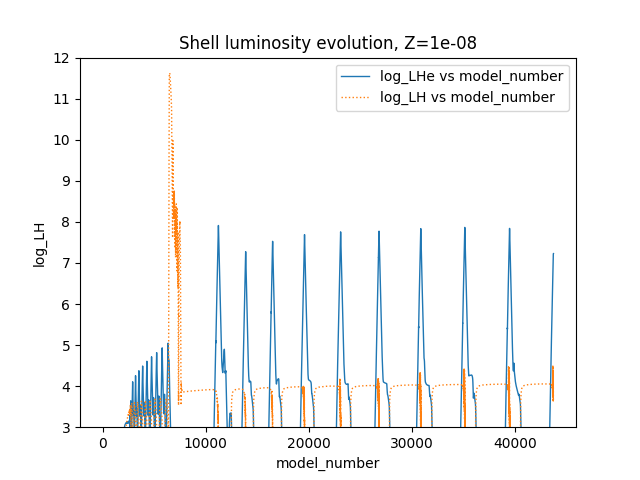

<IPython.core.display.Javascript object>


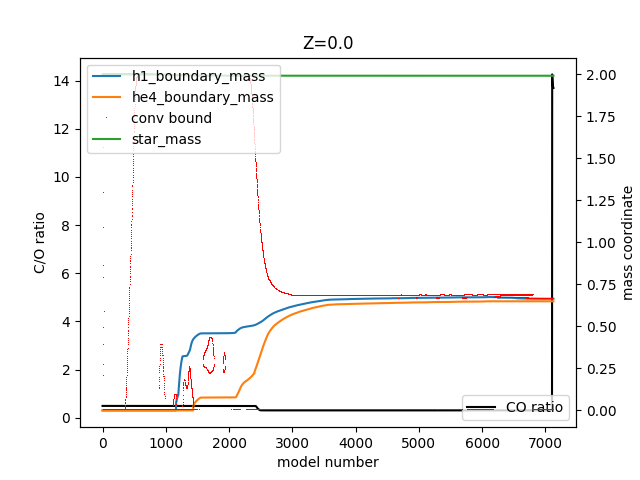

<IPython.core.display.Javascript object>


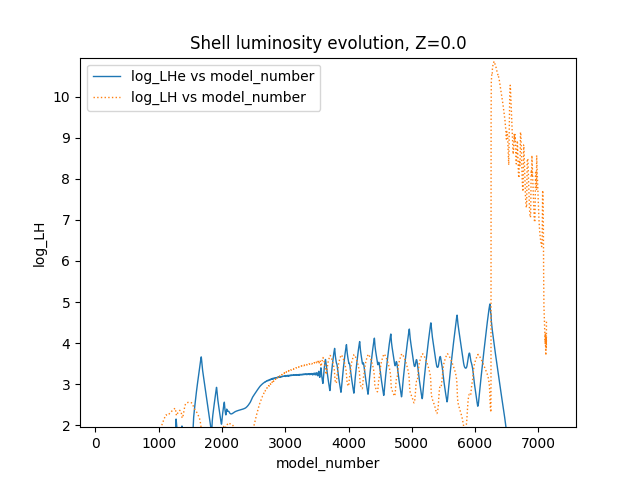

In [73]:
shapes=['-',':','--','-.']; i=5
for s in sints[3:]:
    close(i);figure(i)
    s.kippenhahn_CO(i,'model'); i+=1
    title('Z='+str(s.header_attr['initial_z']))
    close(i);figure(i)
    s.plot('model_number','log_LHe',shape=shapes[mod(i,3)]); i+=1
    s.plot('model_number','log_LH',shape=shapes[mod(i,3)]); i+=1
    ylim(3,12)
    title('Shell luminosity evolution, Z='+str(s.header_attr['initial_z']))

## Z=1e-5

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


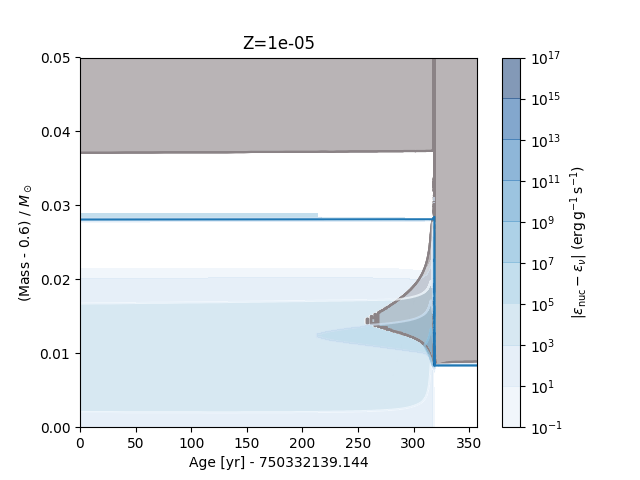

plot versus age
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [74]:
modstart=3090; modstop=4100; s=sints[4]; ifig=16; close(ifig)
s.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop, \
            t0_model=modstart, ixaxis='age', xres=2000, yres=2000, ylims=[0.6,0.65])
title('Z='+str(s.header_attr['initial_z']))

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


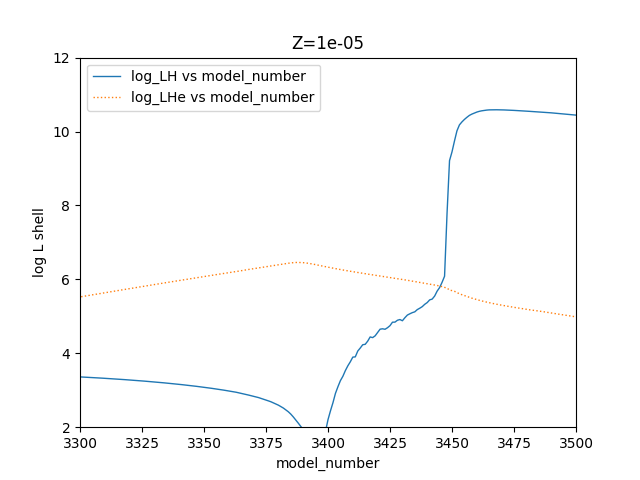

In [102]:
figure(201); shapes=['-',':','--','-.']; i=0
s.plot('model_number','log_LH',shape=shapes[mod(i,4)]); i+=1
s.plot('model_number','log_LHe',shape=shapes[mod(i,4)]); i+=1
title('Z='+str(s.header_attr['initial_z'])); ylim(2,12); xlim(3300,3500); ylabel("log L shell")

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


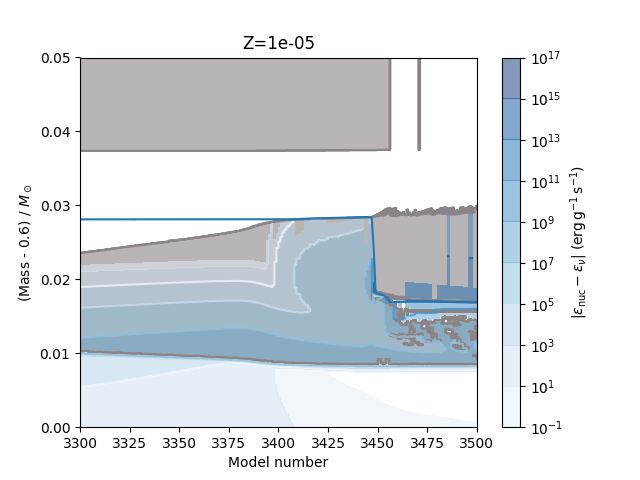

Closing profile tool ...
plot versus model number
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [180]:
modstart=3090; modstop=4100; s=sints[4]; ifig=19; close(ifig)
s.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop, \
             ixaxis='model_number', xres=2000, yres=2000, ylims=[0.6,0.65], xlims=[3300,3500])
title('Z='+str(s.header_attr['initial_z']))

## Evolution of C+O
The first PDCZ with HIF increases the C+O abundance in the envelope by 2 orders of magnitude, removing the conditions for the occurance of the HIF. For that reason the HIF will occur only once in a low-Z AGB evolution. 

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


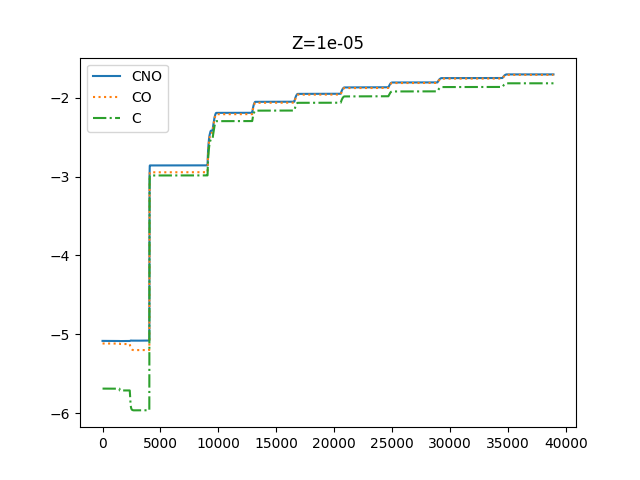

In [185]:
ifig=20; close(ifig); figure(ifig)
plot(s.get('model_number'),log10(s.get('surface_n14')+s.get('surface_c12')+\
                           s.get('surface_o16')),'-',label='CNO')
plot(s.get('model_number'),log10(s.get('surface_c12')+s.get('surface_o16')),':',label='CO')
plot(s.get('model_number'),log10(s.get('surface_c12')),'-.',label='C')
title('Z='+str(s.header_attr['initial_z'])); legend(loc=0)

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


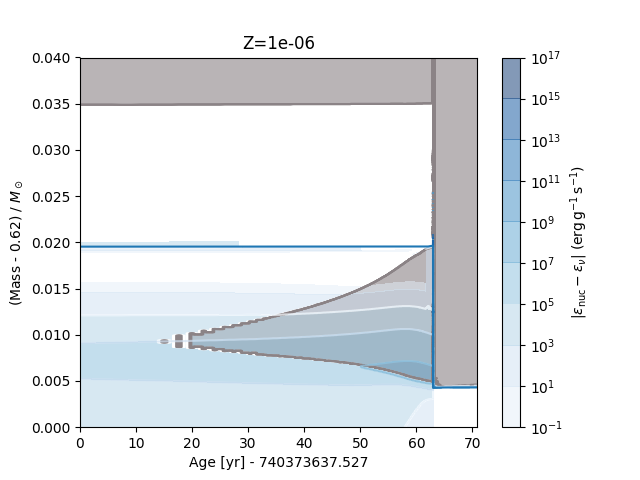

plot versus age
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [77]:
# Z = 1e-6
modstart=2820; modstop=3850; s=sints[5]; ifig=17; close(ifig)
s.kip_cont(ifig=ifig, modstart=modstart, modstop=modstop, \
            t0_model=modstart, ixaxis='age', xres=2000, yres=2000, ylims=[0.62,0.66])
title('Z='+str(s.header_attr['initial_z']))

## redoing the first pulse with HIF
Using smaller time steps to better resolve the HIF and PDCZ. Case 2 is just with more output, whicle case 3 is with smaller time steps. 

In [245]:
%%capture
s5s=[]; case='M2.00Z1.e-5'
for i in range(3):
    s5s.append(ms.star_log(os.path.join(data_dir,case,'LOGS'+str(i+1))))

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


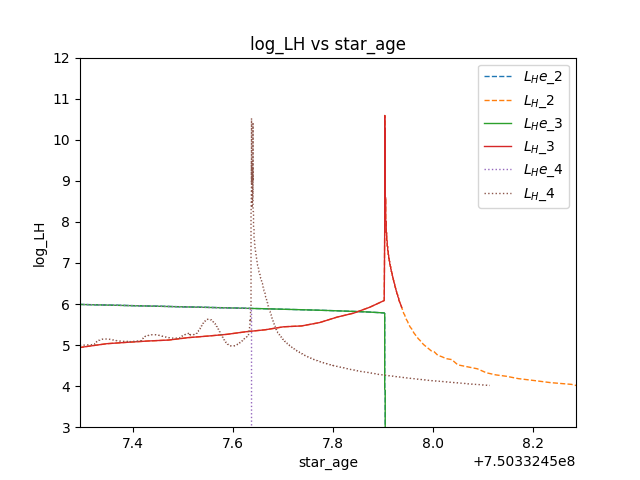

(750332457.2944217, 750332458.2850542)

In [246]:
figure(30)
for s in s5s:
    s.plot('star_age','log_LHe',shape=shapes[mod(i+3,3)], legend='$L_He$_'+str(i))
    s.plot('star_age','log_LH',shape=shapes[mod(i,3)],\
           legend='$L_H$_'+str(i)); i+=1
ylim(3,12); xlim(750332457.29442167, 750332458.28505421)



In [247]:
s=s5s[-1]
t = s.get('star_age')
LH = s.get('log_LH'); LHe = s.get('log_LHe')

In [248]:
mod0=where(s.get('model_number')==15000)[0][0]
print(s.get('model_number')[mod0])

15000.0


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


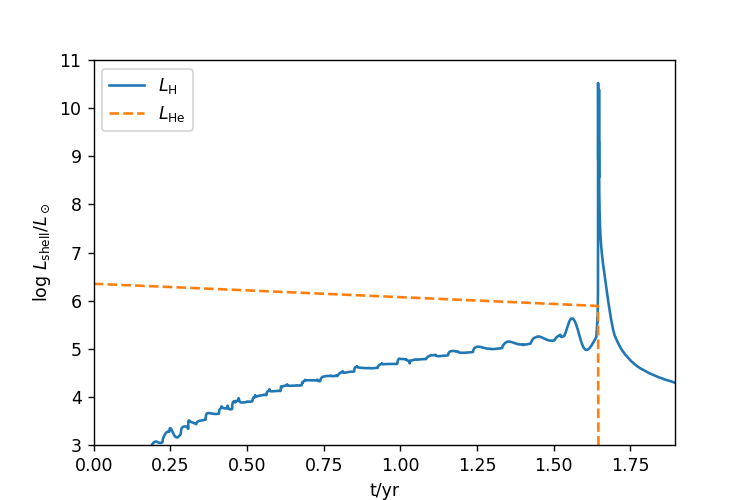

In [250]:
close(31); figure(31,figsize=(6, 4), dpi=125)
t0 = t[mod0]; tend = t[where(s.get('model_number')==32000)[0][0]]
plot(t-t[mod0],LH,shapes[0], label='$L_\mathrm{H}$')
plot(t-t[mod0],LHe,shapes[2], label='$L_\mathrm{He}$')
legend(loc=2)
ylim(3,11); xlim(0,tend-t0)
xlabel('t/yr'); ylabel('$\log \ L_\mathrm{shell}/L_\odot$')
savefig('TP_stellar_evolution_shell_L.pdf')

In [139]:
print(k) for k in s.cols and 

{'burn_c': 230,
 'burn_n': 231,
 'burn_o': 232,
 'burn_qtop_1': 105,
 'burn_qtop_10': 123,
 'burn_qtop_11': 125,
 'burn_qtop_12': 127,
 'burn_qtop_13': 129,
 'burn_qtop_14': 131,
 'burn_qtop_15': 133,
 'burn_qtop_16': 135,
 'burn_qtop_17': 137,
 'burn_qtop_18': 139,
 'burn_qtop_19': 141,
 'burn_qtop_2': 107,
 'burn_qtop_20': 143,
 'burn_qtop_21': 145,
 'burn_qtop_22': 147,
 'burn_qtop_23': 149,
 'burn_qtop_24': 151,
 'burn_qtop_25': 153,
 'burn_qtop_26': 155,
 'burn_qtop_27': 157,
 'burn_qtop_28': 159,
 'burn_qtop_29': 161,
 'burn_qtop_3': 109,
 'burn_qtop_30': 163,
 'burn_qtop_31': 165,
 'burn_qtop_32': 167,
 'burn_qtop_33': 169,
 'burn_qtop_34': 171,
 'burn_qtop_35': 173,
 'burn_qtop_36': 175,
 'burn_qtop_37': 177,
 'burn_qtop_38': 179,
 'burn_qtop_39': 181,
 'burn_qtop_4': 111,
 'burn_qtop_40': 183,
 'burn_qtop_5': 113,
 'burn_qtop_6': 115,
 'burn_qtop_7': 117,
 'burn_qtop_8': 119,
 'burn_qtop_9': 121,
 'burn_type_1': 104,
 'burn_type_10': 122,
 'burn_type_11': 124,
 'burn_type_12':

In [254]:
[ print(k) for k in s.cols.keys() if 'bound' in k]

c12_boundary_lgRho
h1_boundary_radius
h1_boundary_lgT
he4_boundary_radius
h1_boundary_lgRho
c12_boundary_mass
he4_boundary_lgT
c12_boundary_radius
he4_boundary_mass
c12_boundary_lgT
h1_boundary_mass
he4_boundary_lgRho


[None, None, None, None, None, None, None, None, None, None, None, None]

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


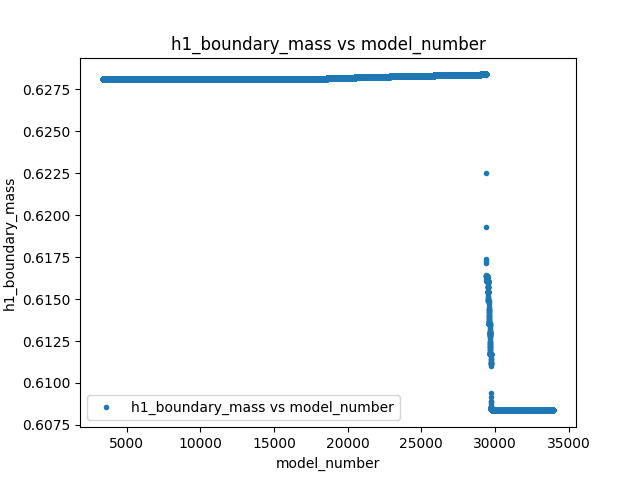

In [252]:
figure(301);s5s[-1].plot('model_number','h1_boundary_mass')

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


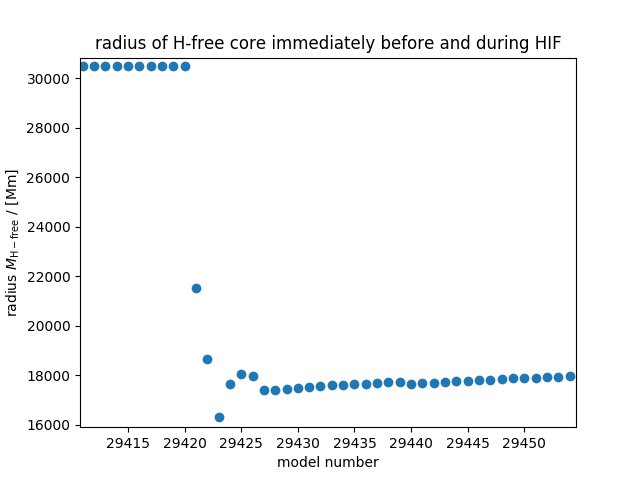

In [258]:
figure(309)  #s5s[-1].plot('model_number','h1_boundary_radius')
plot(s5s[-1].get('model_number'),\
     s5s[-1].get('h1_boundary_radius')*ast.rsun_cm/1.e5,'o')
title('radius of H-free core immediately before and during HIF')
ylabel('radius $M_\mathrm{H-free}$ / [Mm]') 
xlabel('model number')

In [263]:
#amount of mass by which M_Hfree decreases at the first time step of H-ingestion
# 0.0060725578854978757 Msun

# delta_R by which the H-free core is reduced during the one time step when the HIF starts:
delta_R = 1000*(30.5 - 21.5)
print('delta_R H-free: ','%7.1fkm'%(delta_R))
print('delta_R H-free: ','%7.1fHp'%(delta_R/Hp))
# model number after which HIF happens: 
mod_phif  = 29420

delta_R H-free:   9000.0km
delta_R H-free:      2.6Hp


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


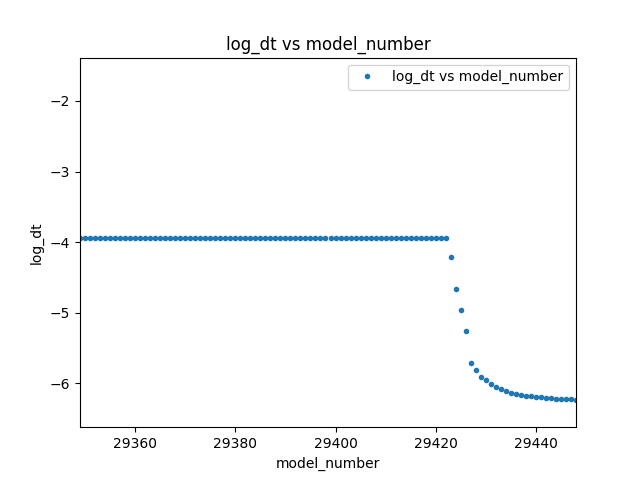

(29349, 29448)

In [253]:
figure(302);s.plot('model_number','log_dt');xlim((29349, 29448))

In [236]:
# time step just before the HIF:
dt_evol = 10**-3.945 * 3.14e7/3600 # in hours
print("Time step just before HIF: ","%4.2fhr"%dt_evol)

Time step just before HIF:  0.99hr


In [175]:
case='M2.00Z1.e-5'   ; print(mod_phif) 
pphif=ms.mesa_profile(os.path.join(data_dir,case,'LOGS3'),mod_phif)

29420
983 in profiles.index file ...
Found and load nearest profile for cycle 29400
reading /data/nugrid_apod2/scratch/MESA/Set_M2Zrange/M2.00Z1.e-5/LOGS3/log892.data ...
 reading ...100% 



In [221]:
# look for variables containing velocity
[ print(k) for k in pphif.cols.keys() if 'pres' in k]

pressure
pressure_scale_height


[None, None]

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


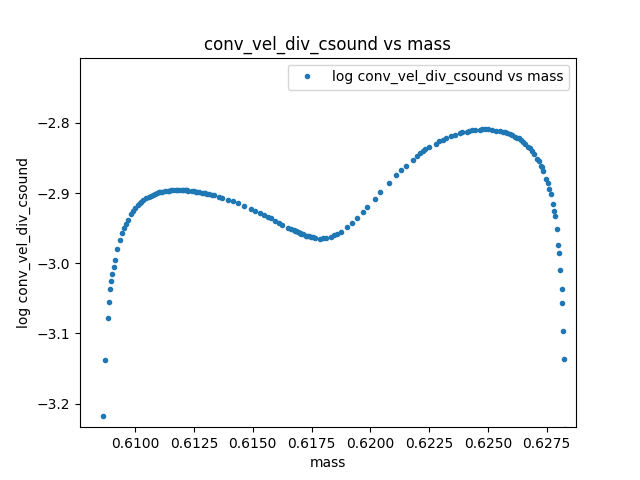

(0.6, 0.65)

In [188]:
figure(303)
pphif.plot('mass','conv_vel_div_csound',logy=True)
xlim(0.6,0.65)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


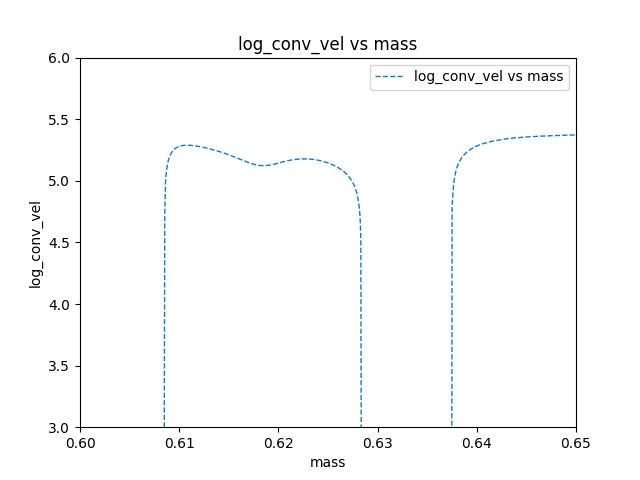

(3, 6)

In [215]:
figure(304)
pphif.plot('mass','log_conv_vel',shape='--')
xlim(0.6,0.65);ylim(3,6)

In [238]:
# range for Ma numbers in convection zone just before HIF
sef = '%10.3e'
print(sef%(10**-2.8),sef%(10**-2.895))

 1.585e-03  1.274e-03


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


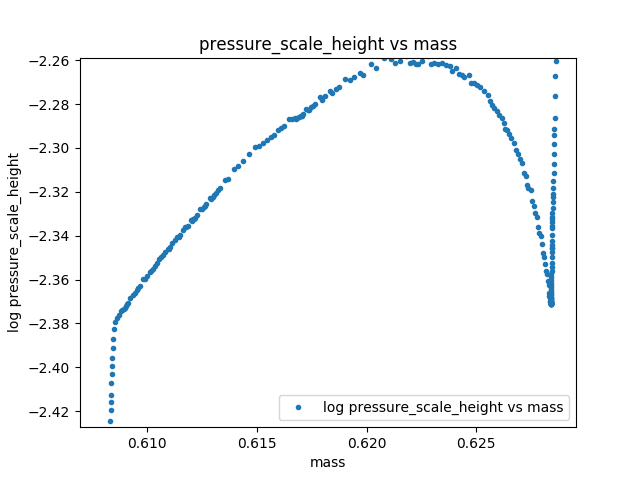

(0.6, 0.65)

In [222]:
figure(306)
pphif.plot('mass','pressure_scale_height',logy=True)
xlim(0.6,0.65)

In [234]:
# pressure scale height in convection zone
Hp = 1.e-5*ast.rsun_cm*10**-2.3     # km
print("pressure scale height: ","%6.1fkm"%Hp)

pressure scale height:  3485.8km


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


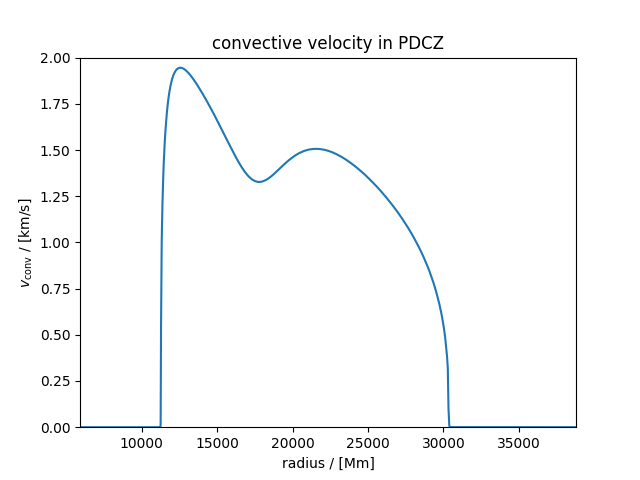

In [216]:
figure(305)
#pphif.plot('radius','log_conv_vel')
plot(pphif.get('radius')*ast.rsun_cm/1.e5,1.e-5*10**pphif.get('log_conv_vel'))
xlim(5900, 38800); ylim(0, 2)
xlabel('radius / [Mm]'); ylabel('$v_\mathrm{conv}$ / [km/s]')
title('convective velocity in PDCZ')

In [230]:
delta_R_conv = (30.38-11.25)*1e3 # km
v_conv = 1.5                     # km/s
t_conv = delta_R_conv/v_conv
print('convection zone crossing time: ',t_conv/3600.,"hr")
t_conv = 1.7*Hp/v_conv
print('convective turnover: ',t_conv/3600.,"hr")

convection zone crossing time:  3.5425925925925927 hr
convective turnover:  1.0973680105170474 hr
